## Q1: What is the impact of days in a week on the number of Burglaries?

Use pandas to cleaning up the data to contain only 'Report Number','Offense Start DateTime','Offense Parent Group',and 'Offense'. Sort all the 'Offense' being 'Burglary/Breaking & Entering' out.

In [18]:
import pandas as pd
import calendar


all_crime_data = pd.read_csv('SPD_Crime_Data__2008-Present.csv')
all_crime_data_clean = all_crime_data[['Report Number','Offense Start DateTime','Offense Parent Group','Offense']]
burglary_crime = all_crime_data_clean[all_crime_data_clean['Offense'] == 'Burglary/Breaking & Entering']


Drop all row without a 'Offense Start DateTime'. Use calendaer to add column 'day_of_week' to the dataframe and save it in a new csv file called Burglary_Crime_Q1.csv.

In [54]:

burglary_crime['Offense Start DateTime'] = pd.to_datetime(burglary_crime['Offense Start DateTime'])

burglary_crime['day_of_week'] = burglary_crime['Offense Start DateTime'].apply(lambda x: x.weekday()) # get the weekday index, between 0 and 6
nan_value = float("NaN")
burglary_crime.replace("", nan_value, inplace=True)
burglary_crime = burglary_crime.dropna(subset=['day_of_week'])
burglary_crime['day_of_week'] = burglary_crime['day_of_week'].apply(lambda x: calendar.day_name[int(x)])
burglary_crime.to_csv('Burglary_Crime_Q1.csv')
burglary_crime.head()

,Report Number,Offense Start DateTime,Offense Parent Group,Offense,day_of_week
581466,2020-043922,2020-02-04 18:54:00,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,Tuesday
581469,2020-043871,2020-02-01 00:00:00,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,Saturday
581472,2020-043640,2020-02-04 00:00:00,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,Tuesday
581473,2020-043634,2020-02-03 23:00:00,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,Monday
581474,2020-043594,2020-01-31 18:00:00,BURGLARY/BREAKING&ENTERING,Burglary/Breaking & Entering,Friday


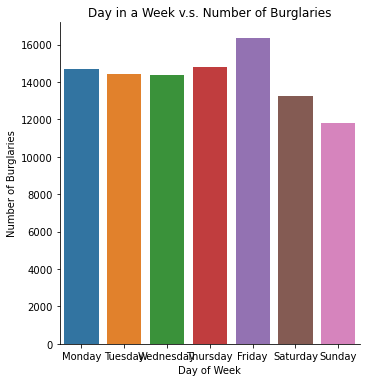

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x='day_of_week', kind='count', data=burglary_crime, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Day in a Week v.s. Number of Burglaries')
plt.xlabel('Day of Week')
plt.ylabel('Number of Burglaries')
# Save the plot to a file
plt.savefig('day_of_week_burglary.png', bbox_inches='tight')

Use matplotlib and seaborn to plot the graph.